https://github.com/ThomasLech/CROHME_extractor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os

In [ ]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

testgt = os.listdir('/content/drive/MyDrive/Output/test')
test = os.listdir('/content/drive/MyDrive/Output/train')
diff(test, testgt)

[]

In [ ]:
for i in os.listdir('/content/drive/MyDrive/Symbols/train'):
  print(i)

In [ ]:
!python crohme_extract.py -b 45 -d 2011 2012 2013 -c custom -t 1 -p /content/drive/MyDrive/TC11_package/ -o /content/drive/MyDrive/Output

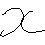

In [ ]:
newtest = pd.read_pickle('/content/drive/MyDrive/Output/train.pickle')
img = Image.fromarray(newtest[200]['features'], 'L')
img

In [ ]:
classes = set(newtest[i]['label'].replace("\\", '') for i in range(len(newtest)))
classes_dict = {key:0 for key in classes}
classes_dict

{'!': 0,
 '(': 0,
 ')': 0,
 '+': 0,
 '-': 0,
 '0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '=': 0,
 'A': 0,
 'B': 0,
 'C': 0,
 'F': 0,
 '[': 0,
 ']': 0,
 'a': 0,
 'alpha': 0,
 'b': 0,
 'beta': 0,
 'c': 0,
 'cos': 0,
 'd': 0,
 'div': 0,
 'e': 0,
 'g': 0,
 'gamma': 0,
 'geq': 0,
 'i': 0,
 'infty': 0,
 'int': 0,
 'j': 0,
 'k': 0,
 'ldots': 0,
 'leq': 0,
 'lim': 0,
 'log': 0,
 'lt': 0,
 'n': 0,
 'neq': 0,
 'phi': 0,
 'pi': 0,
 'pm': 0,
 'rightarrow': 0,
 'sin': 0,
 'sum': 0,
 'tan': 0,
 'theta': 0,
 'times': 0,
 'x': 0,
 'y': 0,
 'z': 0,
 '{': 0,
 '}': 0}

In [ ]:
outputs_dir = '/content/drive/MyDrive/Output/train'

for img in newtest:
  label = img['label'].replace("\\", '')
  img = Image.fromarray(img['features'], 'L')
  class_dir = os.path.join(outputs_dir, label)
  number = classes_dict[label] + 1
  classes_dict[label] += 1
  if not os.path.exists(class_dir): os.mkdir(class_dir)
  img.save(os.path.join(class_dir, label+'_'+str(number)+'.png'))

In [ ]:
classes_dict

{'!': 347,
 '(': 4540,
 ')': 4569,
 '+': 6823,
 '-': 9695,
 '0': 1879,
 '1': 7659,
 '2': 7040,
 '3': 3235,
 '4': 2208,
 '5': 1095,
 '6': 966,
 '7': 899,
 '8': 933,
 '9': 994,
 '=': 2974,
 'A': 249,
 'B': 311,
 'C': 369,
 'F': 275,
 '[': 260,
 ']': 260,
 'a': 2229,
 'alpha': 712,
 'b': 1694,
 'beta': 575,
 'c': 824,
 'cos': 797,
 'd': 1271,
 'div': 217,
 'e': 637,
 'g': 345,
 'gamma': 102,
 'geq': 166,
 'i': 1115,
 'infty': 385,
 'int': 747,
 'j': 390,
 'k': 631,
 'ldots': 114,
 'leq': 210,
 'lim': 468,
 'log': 589,
 'lt': 103,
 'n': 1887,
 'neq': 140,
 'phi': 89,
 'pi': 554,
 'pm': 187,
 'rightarrow': 394,
 'sin': 1166,
 'sum': 685,
 'tan': 731,
 'theta': 644,
 'times': 908,
 'x': 6320,
 'y': 2316,
 'z': 1658,
 '{': 129,
 '}': 129}

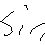

In [ ]:
train = pd.read_pickle('/content/drive/MyDrive/Symbols/train_all.pickle')
img = Image.fromarray(train[200]['features'], 'L')
img

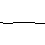

In [ ]:
test = pd.read_pickle('/content/drive/MyDrive/Symbols/test_all.pickle')
img = Image.fromarray(test[-4]['features'], 'L')
img

In [ ]:
test[-4]

{'features': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'label': '-'}

In [ ]:
print(len(train), len(test))

99991 13899


Visualising

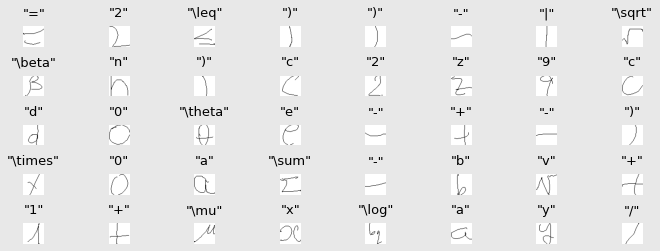

In [ ]:
import matplotlib.pyplot as plt
import math
import random 

train_set = pd.read_pickle('/content/drive/MyDrive/Output/train_all.pickle')

box_size = 45
n_samples = 40
n_cols = 8

# Load classes
classes = open('classes.txt', 'r').read().split()

'Compute number of rows with respect to number of both columns and samples provided by user'
rows_numb = math.ceil(n_samples / n_cols)

'Instanciate a figure to plot samples on'
figure, axis_arr = plt.subplots(rows_numb, n_cols, figsize=(12, 4))
figure.patch.set_facecolor((0.91, 0.91, 0.91))

sample_id = 0
for row in range(rows_numb):
    for col in range(n_cols):

        if sample_id < n_samples:
            'Generate random sample id'
            random_id = random.randint(0, len(train_set))
            training_sample = train_set[random_id]

            axis_arr[row, col].imshow(training_sample['features'], cmap='gray')
            axis_arr[row, col].set_title('\"' + training_sample['label'] + '\"', size=13, y=1.2)

        'Remove explicit axises'
        axis_arr[row, col].axis('off')

        sample_id += 1

'Adjust spacing between subplots and window border'
figure.subplots_adjust(hspace=1.4, wspace=0.2)
plt.show()

In [ ]:
!python visualise.py -n 40 -c 8 -p /content/drive/MyDrive/Output/ -o /content/drive/MyDrive/Output

Whole inkml to image

https://github.com/RobinXL/inkml2img

In [ ]:
for idx in os.listdir('/content/drive/MyDrive/TC11_package/CROHME2013_data/TrainINKML/extension'):
  imgname = os.path.splitext(idx)[0] + '.png'
  !python inkml2img.py "/content/drive/MyDrive/TC11_package/CROHME2013_data/TrainINKML/extension/{idx}" "/content/drive/MyDrive/TC11_package/CROHME2013/train/extension/{imgname}"